# Final Project (Team based)
The datasets to be used are publicly available datasets for sentiment analysis (e.g., IMDb Reviews, Twitter Sentiment140, or Yelp Reviews or similar)

Undertaking: Our workgroup has neither taken nor received help from anyone in this assignment. Also, we attest that we haven't used any of Conversational or Generative AI tool such as ChatGPT or Gemini or similar.

## Your Initials:
- **Sah, Shalini**
- **Hovhannisyan, Arpine**
- **Alkhalaf, Mohanad**

## List of Pip Install

pip install nltk pypdf spellchecker requests beautifulsoup4 numpy matplotlib pandas wordcloud plotly folium datasets transformers tensorflow scikit-learn

## Imports

In [ ]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer, RegexpTokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from pypdf import PdfReader
from spellchecker import SpellChecker
import requests
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from nltk import FreqDist
import pandas as pd
# Download required NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
# Import necessary NLTK components
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk.tokenize
import re
import string
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords

from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
import re
import nltk

# Downloads required NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('words')

# Initialize tools
tokenizer = TreebankWordTokenizer()
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
english_vocab = set(w.lower() for w in nltk.corpus.words.words())

from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import pandas as pd
import folium
from folium.plugins import FastMarkerCluster
# Download the VADER lexicon
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook"

import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", message="A parameter name that contains `beta` will be renamed internally to `bias`.")
warnings.filterwarnings("ignore", message="A parameter name that contains `gamma` will be renamed internally to `weight`.")

nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mohanad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/mohanad/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/mohanad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mohanad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/mohanad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/mohanad/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /Users/mohanad/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mohanad/nltk_data...
[nltk_data]

True

## Dataset Selection (US Election 2016 Tweets Dataset)

### Overview
This dataset contains **1.72 million tweets** collected during the **2016 US Presidential Election**, held on **November 8th, 2016**. The dataset provides an opportunity to analyze public discourse and sentiment trends during this critical period, offering insights into the conversations surrounding the two main candidates: **Donald Trump** and **Hillary Clinton**.

### Dataset Source
The dataset is available for download on Kaggle:  
[US Election 2016 Tweets Dataset](https://www.kaggle.com/datasets/matt0922/us-presidential-election-Tweets)

### Files Included
The dataset consists of two CSV files:
1. **`trump2016.csv`**  
   Contains tweets with hashtags related to **Donald Trump**.

2. **`clinton2016.csv`**  
   Contains tweets with hashtags related to **Hillary Clinton**.

For this analysis, we will use **both CSV files** to focus on tweets associated with **Donald Trump** and **Hillary Clinton**, enabling a comparative sentiment analysis of public opinion for each candidate.

### Analysis Purpose
The primary goal is to perform **sentiment analysis** on the tweets to:
- Understand public sentiment towards **Donald Trump** and **Hillary Clinton** during the election period.
- Identify key themes and trends in the discussions related to each candidate.
- Compare how sentiment evolved over time for both candidates leading up to and after the election.

### Instructions for Use
1. Download the dataset from Kaggle using the provided link.
2. Save the CSV files (`trump2016.csv` and `clinton2016.csv`) in the project directory.
3. Load both files into the analysis environment (Jupyter Notebook) for processing.
```

## 1. Dataset Preparation 

### 1.1 Load The dataset 

In [2]:
# Load the datasets
trump_file_path = 'trump2016.csv'
clinton_file_path = 'clinton2016.csv'

trump_df = pd.read_csv(trump_file_path,lineterminator='\n')
clinton_df = pd.read_csv(clinton_file_path,lineterminator='\n')


In [3]:
# Count the rows for each DataFrame
trump_row_count = len(trump_df)
clinton_row_count = len(clinton_df)

print(f"Number of rows in Trump DataFrame: {trump_row_count}")
print(f"Number of rows in Clinton DataFrame: {clinton_row_count}")

Number of rows in Trump DataFrame: 817320
Number of rows in Clinton DataFrame: 279562


#### 1.1.1 Print Hashtage Donald Trump Tweets:

In [4]:
trump_df.head()

Date          User  \
0  2016-11-08 23:47:02+00:00    SimbasLair   
1  2016-11-08 23:40:07+00:00    SimbasLair   
2  2016-11-08 23:28:25+00:00    SimbasLair   
3  2016-11-08 22:57:27+00:00    SimbasLair   
4  2016-11-08 22:43:17+00:00  AlaskanBased   

                                              Tweets  LikeCount  RetweetCount  \
0  @LisaForSenate \nYou didnt support Trump, So m...          0             0   
1  Media says No voting fraud, I have SEEN the vi...          0             0   
2  @RealHeatherRoss \nDont sit and watch the lyin...          0             0   
3  @realDonaldTrump \nDont believe the Media, the...          0             0   
4  I prayed today. I've only prayed a hand count ...          1             0   

   ReplyCount  ViewCount                                              Place  \
0           0        NaN  Place(id='07179f4fe0500a32', fullName='Alaska,...   
1           0        NaN  Place(id='07179f4fe0500a32', fullName='Alaska,...   
2           0        NaN  Place(id='07179f4fe0500a32', fullName='Alaska,...   
3           0        NaN  Place(id='07179f4fe0500a32', fullName='Alaska,...   
4           0        NaN  Place(id='07179f4fe0500a32', fullName='Alaska,...   

  STATE  Hashtags                                              url\r  
0    AK       NaN  https://twitter.com/SimbasLair/status/79613697...  
1    AK       NaN  https://twitter.com/SimbasLair/status/79613523...  
2    AK       NaN  https://twitter.com/SimbasLair/status/79613229...  
3    AK       NaN  https://twitter.com/SimbasLair/status/79612450...  
4    AK  ['MAGA']  https://twitter.com/AlaskanBased/status/796120...

#### 1.1.2 Print Hashtage Clinton Tweets:

In [5]:
clinton_df.head()

Date        User  \
0  2016-11-08 23:09:21+00:00  SimbasLair   
1  2016-11-08 23:06:27+00:00  SimbasLair   
2  2016-11-08 22:57:27+00:00  SimbasLair   
3  2016-11-08 15:24:50+00:00  OffgridMom   
4  2016-11-08 04:28:13+00:00  SimbasLair   

                                              Tweets  LikeCount  RetweetCount  \
0  More Clinton corruption, Drain the swamp or fl...          0             0   
1  Clinton corruption primer, educate Yourselves ...          0             0   
2  @realDonaldTrump \nDont believe the Media, the...          0             0   
3  Arguing with a Clinton follower is pointless. ...          0             0   
4  Bill Clinton flying on Pedophile's jet to Orgy...          0             0   

   ReplyCount  ViewCount                                              Place  \
0           0        NaN  Place(id='07179f4fe0500a32', fullName='Alaska,...   
1           0        NaN  Place(id='07179f4fe0500a32', fullName='Alaska,...   
2           0        NaN  Place(id='07179f4fe0500a32', fullName='Alaska,...   
3           0        NaN  Place(id='07179f4fe0500a32', fullName='Alaska,...   
4           0        NaN  Place(id='07179f4fe0500a32', fullName='Alaska,...   

  STATE Hashtags                                              url\r  
0    AK      NaN  https://twitter.com/SimbasLair/status/79612749...  
1    AK      NaN  https://twitter.com/SimbasLair/status/79612676...  
2    AK      NaN  https://twitter.com/SimbasLair/status/79612450...  
3    AK      NaN  https://twitter.com/OffgridMom/status/79601059...  
4    AK      NaN  https://twitter.com/SimbasLair/status/79584535...

### 1.2 Preprocess the data

#### 1.2.1 Handle missing or imbalanced data (if applicable)

**Remove Columns:** This code removes unnecessary columns from the Trump and Clinton datasets to streamline data processing.


In [6]:
# Remove unneeded columns
trump_df = trump_df.drop(columns=['LikeCount', 'RetweetCount', 'ReplyCount', 'ViewCount', 'url\r', 'User','Hashtags'])
clinton_df = clinton_df.drop(columns=['LikeCount', 'RetweetCount', 'ReplyCount', 'ViewCount', 'url\r', 'User','Hashtags'])

**Mapping U.S. States to Geographical Coordinates:** : A Data Enrichment Process

**Read State Bounds Data:** Loads a CSV file containing the geographical boundaries of states into a DataFrame.

**Define State Finder Function:** Creates a function to determine the U.S. state for given latitude and longitude coordinates by comparing them against predefined state boundaries.

**Assign States to Data:** Applies the state-finding function to each record in the dataset, assigning the appropriate state based on geographical coordinates.


In [7]:

# Read the state coordinates CSV file into a DataFrame
df_state_coords = pd.read_csv('state_coordinates.csv')

# Create a mapping between state codes and their latitude and longitude bounds
state_code_mapping = df_state_coords.set_index('StateCode').T.to_dict('list')

# Function to get latitude and longitude bounds based on state code
def get_lat_long_bounds(state_code):
    bounds = state_code_mapping.get(state_code)
    if bounds:
        return bounds[1], bounds[2], bounds[3], bounds[4]  # MinLat, MaxLat, MinLong, MaxLong
    return None, None, None, None

# Add latitude and longitude columns to the DataFrame
def add_lat_long_columns(df):
    df['MinLat'], df['MaxLat'], df['MinLong'], df['MaxLong'] = zip(*df['STATE'].apply(get_lat_long_bounds))
    return df

# Apply the function to both DataFrames
trump_df = add_lat_long_columns(trump_df)
clinton_df = add_lat_long_columns(clinton_df)

# Print the updated DataFrames
print(trump_df.head())
print(clinton_df.head())

                        Date  \
0  2016-11-08 23:47:02+00:00   
1  2016-11-08 23:40:07+00:00   
2  2016-11-08 23:28:25+00:00   
3  2016-11-08 22:57:27+00:00   
4  2016-11-08 22:43:17+00:00   

                                              Tweets  \
0  @LisaForSenate \nYou didnt support Trump, So m...   
1  Media says No voting fraud, I have SEEN the vi...   
2  @RealHeatherRoss \nDont sit and watch the lyin...   
3  @realDonaldTrump \nDont believe the Media, the...   
4  I prayed today. I've only prayed a hand count ...   

                                               Place STATE   MinLat   MaxLat  \
0  Place(id='07179f4fe0500a32', fullName='Alaska,...    AK  51.1751  71.4398   
1  Place(id='07179f4fe0500a32', fullName='Alaska,...    AK  51.1751  71.4398   
2  Place(id='07179f4fe0500a32', fullName='Alaska,...    AK  51.1751  71.4398   
3  Place(id='07179f4fe0500a32', fullName='Alaska,...    AK  51.1751  71.4398   
4  Place(id='07179f4fe0500a32', fullName='Alaska,...    AK  51.1751  7

In [8]:
trump_df.head()

Date  \
0  2016-11-08 23:47:02+00:00   
1  2016-11-08 23:40:07+00:00   
2  2016-11-08 23:28:25+00:00   
3  2016-11-08 22:57:27+00:00   
4  2016-11-08 22:43:17+00:00   

                                              Tweets  \
0  @LisaForSenate \nYou didnt support Trump, So m...   
1  Media says No voting fraud, I have SEEN the vi...   
2  @RealHeatherRoss \nDont sit and watch the lyin...   
3  @realDonaldTrump \nDont believe the Media, the...   
4  I prayed today. I've only prayed a hand count ...   

                                               Place STATE   MinLat   MaxLat  \
0  Place(id='07179f4fe0500a32', fullName='Alaska,...    AK  51.1751  71.4398   
1  Place(id='07179f4fe0500a32', fullName='Alaska,...    AK  51.1751  71.4398   
2  Place(id='07179f4fe0500a32', fullName='Alaska,...    AK  51.1751  71.4398   
3  Place(id='07179f4fe0500a32', fullName='Alaska,...    AK  51.1751  71.4398   
4  Place(id='07179f4fe0500a32', fullName='Alaska,...    AK  51.1751  71.4398   

    MinLong   MaxLong  
0 -179.1489 -129.9795  
1 -179.1489 -129.9795  
2 -179.1489 -129.9795  
3 -179.1489 -129.9795  
4 -179.1489 -129.9795

In [9]:
clinton_df.head()

Date  \
0  2016-11-08 23:09:21+00:00   
1  2016-11-08 23:06:27+00:00   
2  2016-11-08 22:57:27+00:00   
3  2016-11-08 15:24:50+00:00   
4  2016-11-08 04:28:13+00:00   

                                              Tweets  \
0  More Clinton corruption, Drain the swamp or fl...   
1  Clinton corruption primer, educate Yourselves ...   
2  @realDonaldTrump \nDont believe the Media, the...   
3  Arguing with a Clinton follower is pointless. ...   
4  Bill Clinton flying on Pedophile's jet to Orgy...   

                                               Place STATE   MinLat   MaxLat  \
0  Place(id='07179f4fe0500a32', fullName='Alaska,...    AK  51.1751  71.4398   
1  Place(id='07179f4fe0500a32', fullName='Alaska,...    AK  51.1751  71.4398   
2  Place(id='07179f4fe0500a32', fullName='Alaska,...    AK  51.1751  71.4398   
3  Place(id='07179f4fe0500a32', fullName='Alaska,...    AK  51.1751  71.4398   
4  Place(id='07179f4fe0500a32', fullName='Alaska,...    AK  51.1751  71.4398   

    MinLong   MaxLong  
0 -179.1489 -129.9795  
1 -179.1489 -129.9795  
2 -179.1489 -129.9795  
3 -179.1489 -129.9795  
4 -179.1489 -129.9795

#### 1.2.2 Link,Hashtag and UserName Removal

In [10]:
def remove_links_hashtags_and_usernames(text):
    """
    Remove URLs, hashtags, and usernames from a given text.
    """
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove hashtags
    text = re.sub(r'#\S+', '', text)
    # Remove usernames
    text = re.sub(r'@\w+', '', text)
    return text

#### 1.2.3 English Language Detection
Keep Only english tweets 

In [11]:
# Function to detect if the tweet is in English
def is_english(text):
    try:
        words = nltk.word_tokenize(text)
        text_vocab = set(w.lower() for w in words if w.isalpha())
        unusual = text_vocab.difference(english_vocab)
        return len(unusual) < len(text_vocab) / 2
    except:
        return False

#### 1.2.4 Tokenization Stop-word removal - Text normalizatio(lowercasing, lemmatization)
Raw Tweet → Remove URLs/Hashtags → Lowercase → Tokenize → Remove Stop Words → Lemmatize → Rejoin Text

In [12]:
political_stopwords = {
    # Donald Trump-related terms
    "trump", "realdonaldtrump", "realtrump", "donald", "maga", 
    "gop", "republican", "conservative", "america", "make", 
    "win", "lose", "campaign", "right", "administration", 
    "leader", "law", "state", "president", "term", "office",
    
    # Hillary Clinton-related terms
    "hillary", "clinton", "hillaryclinton", "democrat", "liberal", 
    "campaign", "left", "voters", "citizens", "congress", "senate", 
    "house", "elections", "government", "constitution", "states", 
    "politics", "political", "running", "senator", "representative",

    # General political terms
    "election", "vote", "policy", "whitehouse","debate", "cabinet", "vice", "amp",

    # Generic terms
    "like", "u", "people", "and", "or", "so", "just", "even",
    "many", "one", "also", "us", "get", "back", "way", "still",
    "think", "know", "see", "time", "much", "said", "say", "would", 
    "nt", "go", "day", "year", "new", "good", "take", "could", 
    "may", "look", "want", "come"
}


def preprocess_tweet_systematically(tweet):
    # Initial text cleaning
    tweet = remove_links_hashtags_and_usernames(tweet)
    
    # Tokenization
    tokens = nltk.word_tokenize(tweet)
    
    # Text normalization
    tokens = [token.lower() for token in tokens]  # Lowercase
    tokens = [re.sub(r'[^a-zA-Z\s]', '', token) for token in tokens]  # Remove special characters
    tokens = [token for token in tokens if token]  # Remove empty strings
    
    # Combine general and political stopwords
    combined_stopwords = stop_words.union(political_stopwords)
    
    # Stop-word and political stopword removal
    tokens = [token for token in tokens if token not in combined_stopwords]
    
    # Lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return ' '.join(tokens)

#### 1.2.5 Preprocess the data and update the Datasets

In [13]:
# Apply preprocessing to Trump and Clinton datasets, keeping only English tweets
trump_df = trump_df[trump_df['Tweets'].apply(is_english)]
clinton_df = clinton_df[clinton_df['Tweets'].apply(is_english)]

trump_df['NewTweet'] = trump_df['Tweets'].apply(preprocess_tweet_systematically)
clinton_df['NewTweet'] = clinton_df['Tweets'].apply(preprocess_tweet_systematically)

# Display the updated DataFrames
print("\nUpdated Trump DataFrame:")
print(trump_df.head())

print("\nUpdated Clinton DataFrame:")
print(clinton_df.head())


Updated Trump DataFrame:
                        Date  \
0  2016-11-08 23:47:02+00:00   
1  2016-11-08 23:40:07+00:00   
2  2016-11-08 23:28:25+00:00   
3  2016-11-08 22:57:27+00:00   
4  2016-11-08 22:43:17+00:00   

                                              Tweets  \
0  @LisaForSenate \nYou didnt support Trump, So m...   
1  Media says No voting fraud, I have SEEN the vi...   
2  @RealHeatherRoss \nDont sit and watch the lyin...   
3  @realDonaldTrump \nDont believe the Media, the...   
4  I prayed today. I've only prayed a hand count ...   

                                               Place STATE   MinLat   MaxLat  \
0  Place(id='07179f4fe0500a32', fullName='Alaska,...    AK  51.1751  71.4398   
1  Place(id='07179f4fe0500a32', fullName='Alaska,...    AK  51.1751  71.4398   
2  Place(id='07179f4fe0500a32', fullName='Alaska,...    AK  51.1751  71.4398   
3  Place(id='07179f4fe0500a32', fullName='Alaska,...    AK  51.1751  71.4398   
4  Place(id='07179f4fe0500a32', fullName='Al

In [14]:
# Export the 'NewTweet' and 'sentiment' columns of the first 1000 rows of trump_df to a CSV file
trump_df[['NewTweet']].to_csv('trump2016_cleaned.csv', index=False)

# Export the 'NewTweet' and 'sentiment' columns of the first 1000 rows of clinton_df to a CSV file
clinton_df[['NewTweet']].to_csv('clinton2016_cleaned.csv', index=False)

### 1.3 Add Sentiment Analysis to the Dataset

The dataset currently lacks a sentiment column, which is essential for performing sentiment-based exploratory data analysis. We will use a sentiment analysis model (VADER) to calculate the sentiment for each tweet in the NewTweet column and classify it as positive, negative, or neutral.

In [15]:
# Initialize VADER SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to derive sentiment
def derive_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to derive the sentiment column
trump_df['sentiment'] = trump_df['NewTweet'].apply(derive_sentiment)
clinton_df['sentiment'] = clinton_df['NewTweet'].apply(derive_sentiment)

# Display the updated DataFrames
print("\nTrump DataFrame with Sentiment:")
print(trump_df[['NewTweet', 'sentiment']].head())

print("\nClinton DataFrame with Sentiment:")
print(clinton_df[['NewTweet', 'sentiment']].head())



Trump DataFrame with Sentiment:
                                            NewTweet sentiment
0        didnt support dad didnt support voted today  negative
1  medium say voting fraud seen video showing mac...  negative
2  dont sit watch lying medium poll medium lie su...  positive
3       dont believe medium lie suppress medium call   neutral
4  prayed today prayed hand count time life pray ...  positive

Clinton DataFrame with Sentiment:
                                            NewTweet sentiment
0  corruption drain swamp flush toilet might last...  positive
1  corruption primer educate evil exude googlecomamp  negative
2       dont believe medium lie suppress medium call   neutral
3         arguing follower pointless deaf dumb blind  negative
4     bill flying pedophile jet orgy island daughter   neutral


cardiffnlp/twitter-roberta-base-sentiment-latest 
Pretrained on Twitter Data: It specializes in understanding the nuances of tweets, including hashtags, mentions, and informal language.
Good Accuracy: It is fine-tuned for sentiment tasks with a proven performance on social media data.

In [16]:
# Export the updated DataFrames to CSV files
trump_df[['NewTweet', 'sentiment']].to_csv('trump2016_cleaned.csv', index=False)
clinton_df[['NewTweet', 'sentiment']].to_csv('clinton2016_cleaned.csv', index=False)

## 2. Exploratory Data Analysis (EDA)



### 2.1 Visulaztion 

#### 2.1.1 Visualize Word Frequencies


Trump Tweets - Sentiment: positive


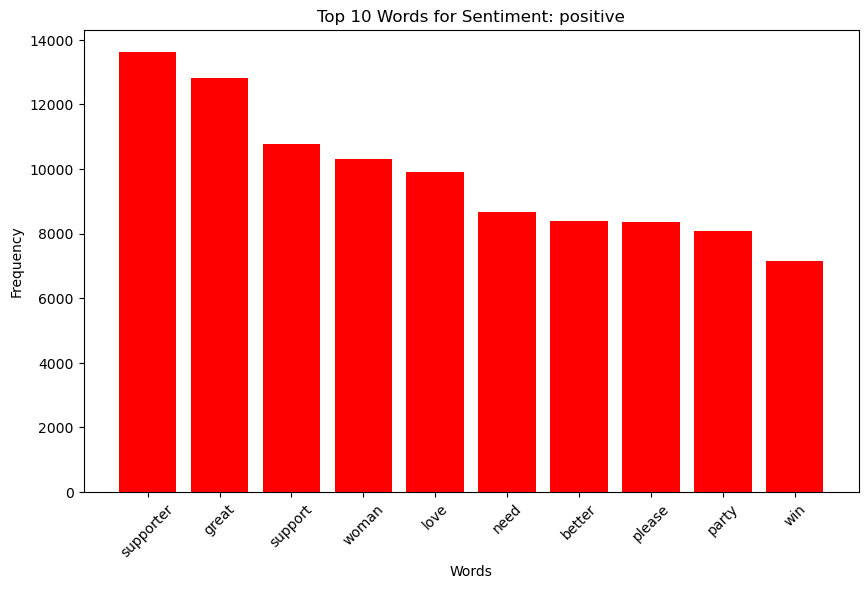


Trump Tweets - Sentiment: negative


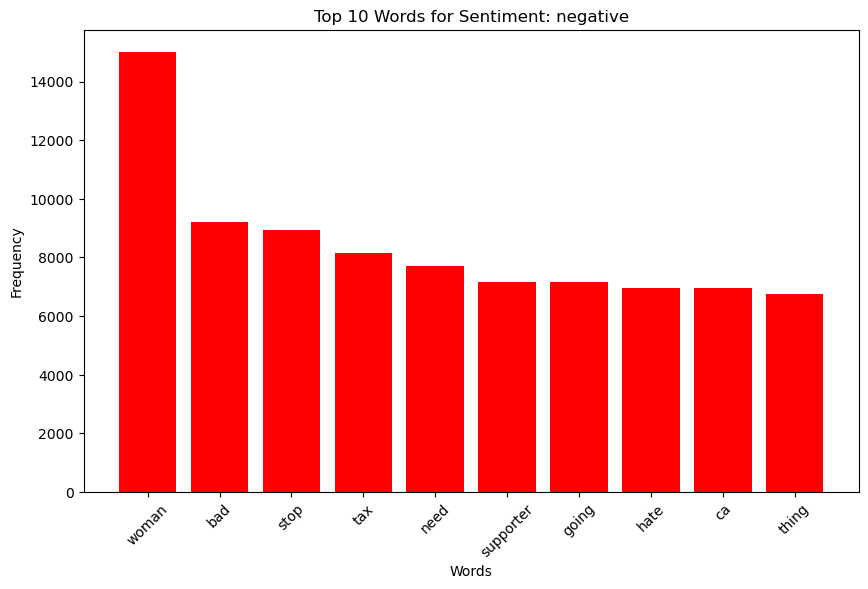


Trump Tweets - Sentiment: neutral


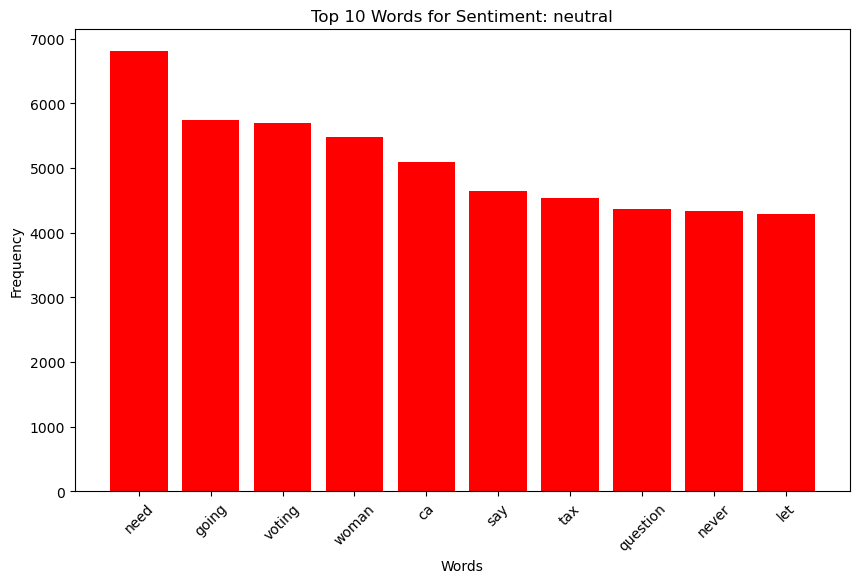


Clinton Tweets - Sentiment: positive


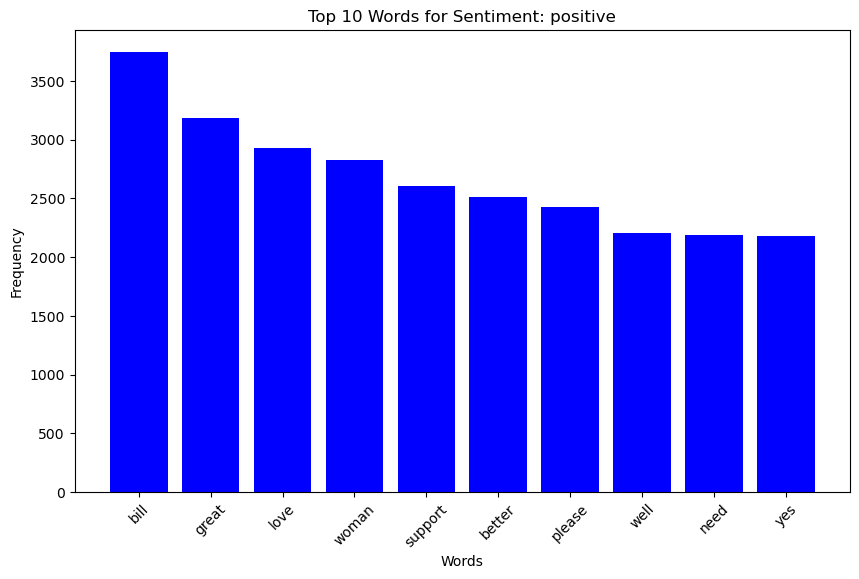


Clinton Tweets - Sentiment: negative


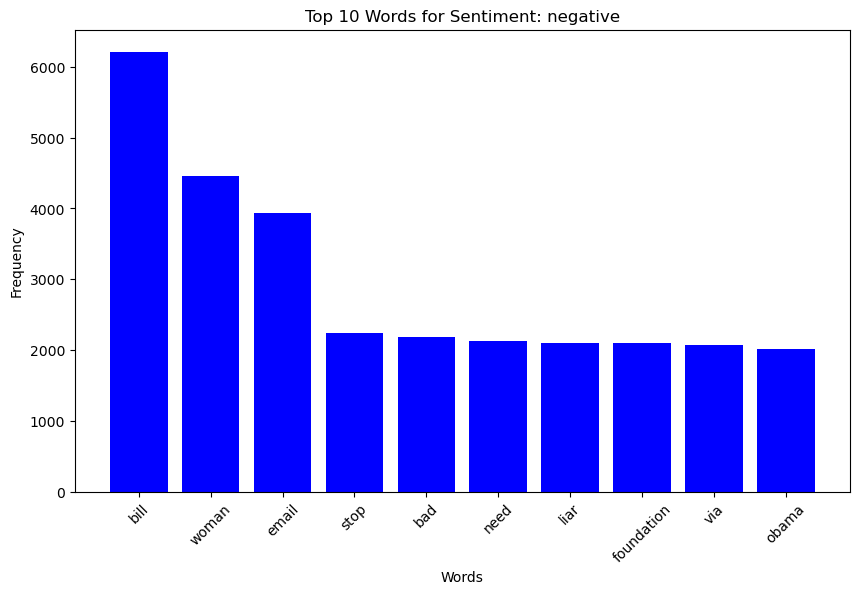


Clinton Tweets - Sentiment: neutral


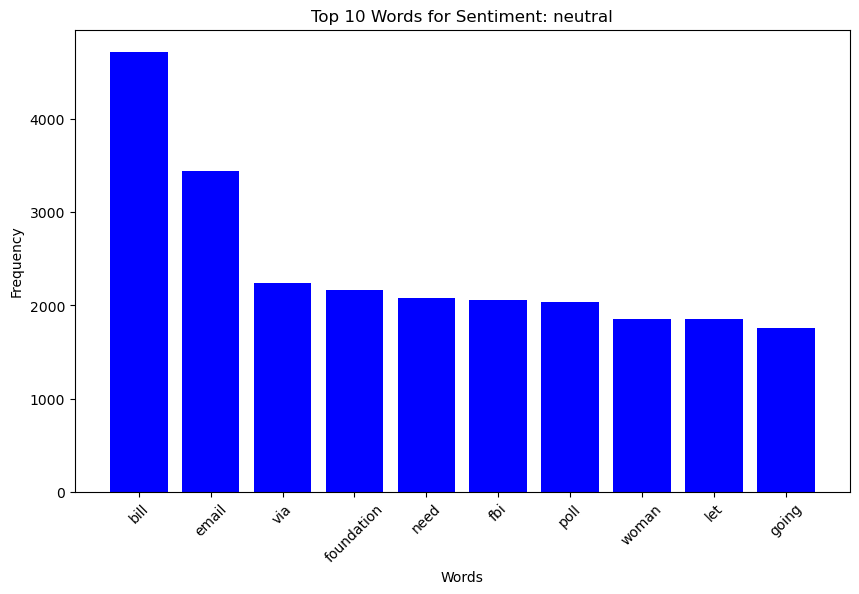

In [17]:
# Function to visualize word frequencies using a bar chart
def visualize_word_frequencies(df, sentiment, column='NewTweet', top_n=10, color='blue'):
    words = ' '.join(df[df['sentiment'] == sentiment][column]).split()
    common_words = Counter(words).most_common(top_n)
    words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
    
    # Bar chart for word frequencies
    plt.figure(figsize=(10, 6))
    plt.bar(words_df['Word'], words_df['Frequency'], color=color)
    plt.title(f"Top {top_n} Words for Sentiment: {sentiment}")
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Sentiment categories
sentiments = ['positive', 'negative', 'neutral']

# Visualize word frequencies for each sentiment class in Trump DataFrame (Red for Republican)
for sentiment in sentiments:
    print(f"\nTrump Tweets - Sentiment: {sentiment}")
    visualize_word_frequencies(trump_df, sentiment=sentiment, color='red')

# Visualize word frequencies for each sentiment class in Clinton DataFrame (Blue for Democratic)
for sentiment in sentiments:
    print(f"\nClinton Tweets - Sentiment: {sentiment}")
    visualize_word_frequencies(clinton_df, sentiment=sentiment, color='blue')


#### 2.1.1 Visualize Word Cloud 


Trump Tweets - Sentiment: positive


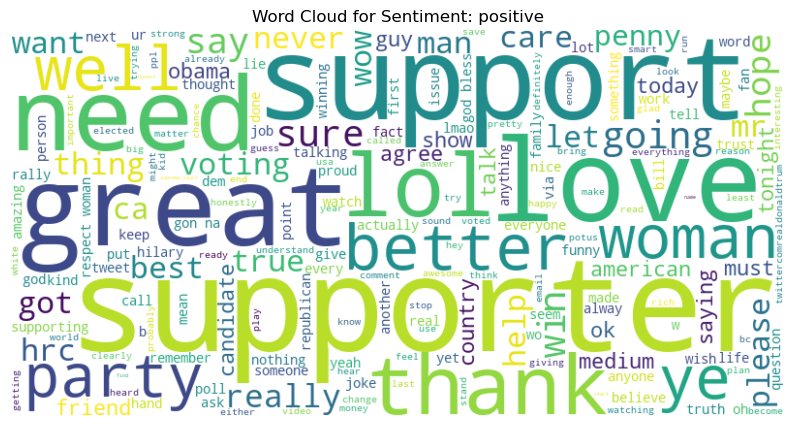


Trump Tweets - Sentiment: negative


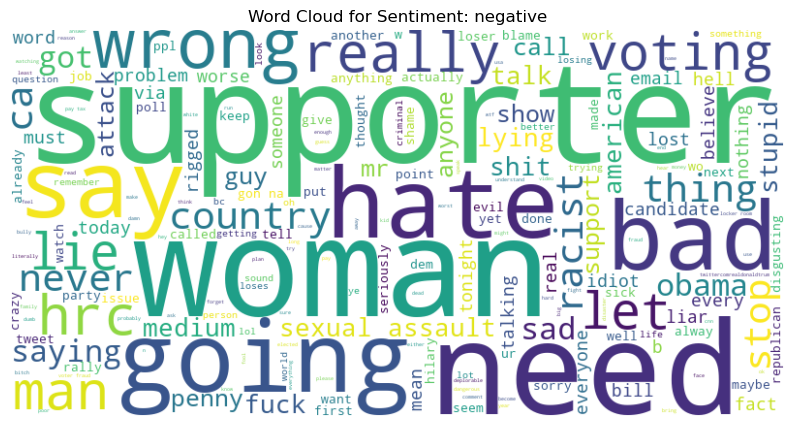


Trump Tweets - Sentiment: neutral


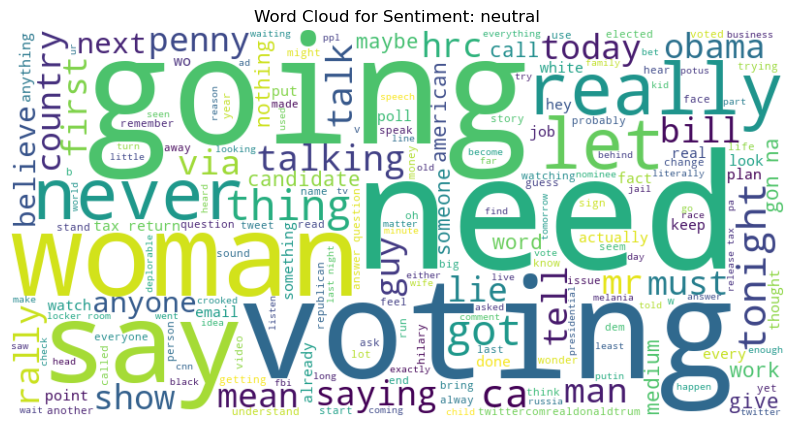


Clinton Tweets - Sentiment: positive


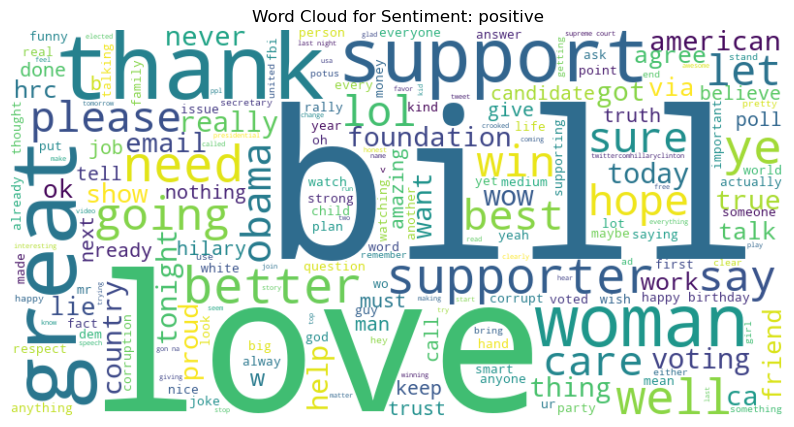


Clinton Tweets - Sentiment: negative


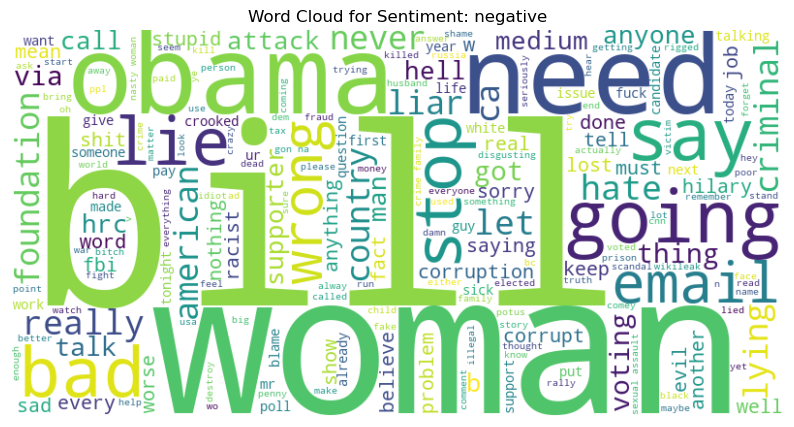


Clinton Tweets - Sentiment: neutral


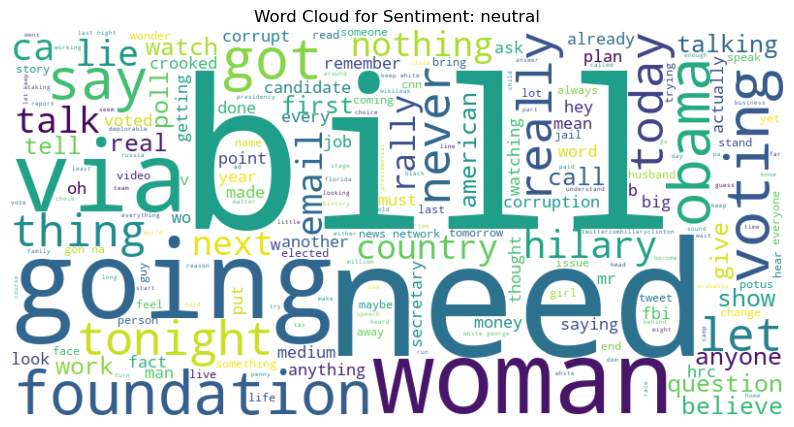

In [18]:

# Function to visualize word frequencies using a word cloud
def visualize_word_cloud(df, sentiment, column='NewTweet'):
    words = ' '.join(df[df['sentiment'] == sentiment][column])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)
    
    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Sentiment: {sentiment}")
    plt.show()

# Visualize word clouds for each sentiment class in Trump DataFrame
for sentiment in sentiments:
    print(f"\nTrump Tweets - Sentiment: {sentiment}")
    visualize_word_cloud(trump_df, sentiment=sentiment)

# Visualize word clouds for each sentiment class in Clinton DataFrame
for sentiment in sentiments:
    print(f"\nClinton Tweets - Sentiment: {sentiment}")
    visualize_word_cloud(clinton_df, sentiment=sentiment)


### 2.2 Plot the Class Distribution of Sentiments (Positive, Negative, Neutral)

### 2.2.1 Plot Sentiment Distribution


Trump Tweets Sentiment Distribution


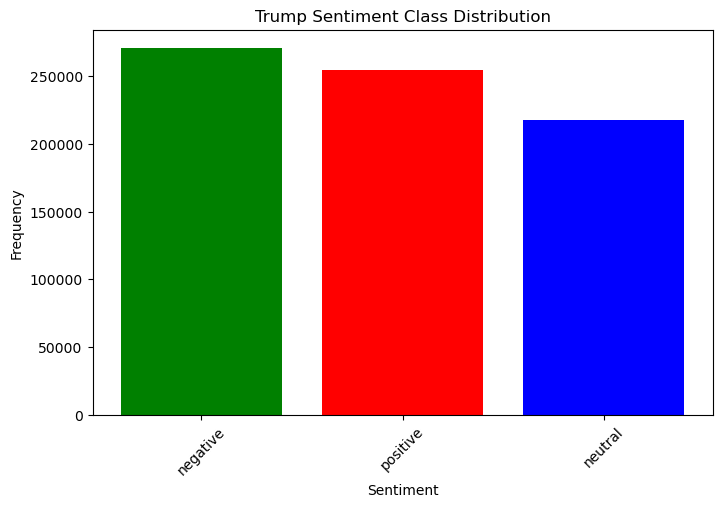


Clinton Tweets Sentiment Distribution


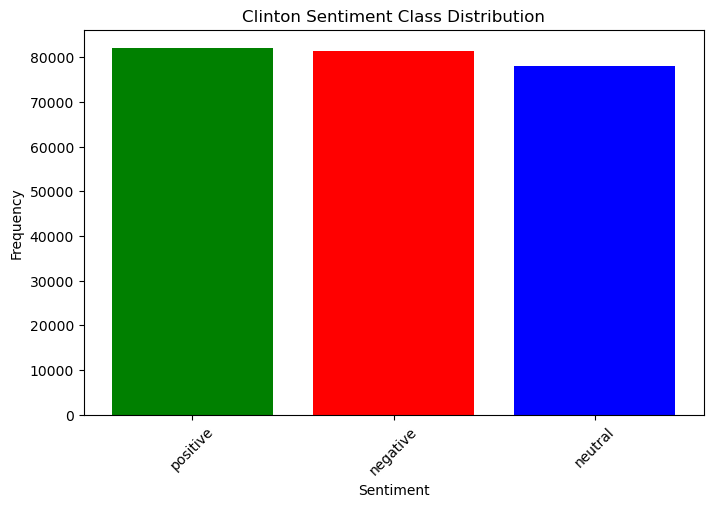

In [19]:
# Function to plot sentiment class distribution
def plot_sentiment_distribution(df, title="Sentiment Class Distribution"):
    sentiment_counts = df['sentiment'].value_counts()
    
    # Plot a bar chart for class distribution
    plt.figure(figsize=(8, 5))
    plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'])
    plt.title(title)
    plt.xlabel('Sentiment')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Plot sentiment distribution for Trump DataFrame
print("\nTrump Tweets Sentiment Distribution")
plot_sentiment_distribution(trump_df, title="Trump Sentiment Class Distribution")

# Plot sentiment distribution for Clinton DataFrame
print("\nClinton Tweets Sentiment Distribution")
plot_sentiment_distribution(clinton_df, title="Clinton Sentiment Class Distribution")


### 2.2.2 Plot Sentiment Distribution Per Sate view the us map 

In [20]:
import pandas as pd
import plotly.express as px

def calculate_sentiment_winners(df):
    """
    Calculate the dominant sentiment (positive, negative, or neutral) for each state.
    """
    # Group by state and count sentiment occurrences
    sentiment_counts = df.groupby(['STATE', 'sentiment']).size().unstack(fill_value=0)
    
    # Determine the dominant sentiment in each state
    sentiment_counts['Dominant'] = sentiment_counts.idxmax(axis=1)
    
    # Map dominant sentiment to colors: positive (red), negative (blue), neutral (gray)
    color_mapping = {'positive': 'red', 'negative': 'blue', 'neutral': 'gray'}
    sentiment_counts['Color'] = sentiment_counts['Dominant'].map(color_mapping)
    
    return sentiment_counts.reset_index()

def plot_sentiment_map(df, title="Sentiment Map"):
    """
    Plot a choropleth map with states highlighted based on sentiment results.
    """
    # Calculate sentiment winners
    sentiment_winners = calculate_sentiment_winners(df)
    
    # Create a choropleth map using Plotly
    fig = px.choropleth(
        sentiment_winners,
        locations="STATE",
        locationmode="USA-states",
        color="Color",
        scope="usa",
        title=title,
        color_discrete_map={"red": "red", "blue": "blue", "gray": "gray"}
    )
    
    # Update layout for better visualization
    fig.update_layout(
        geo=dict(
            lakecolor="white",
            showlakes=True,
            showcoastlines=False,
            projection_type="albers usa",
        ),
        title=dict(x=0.5),
    )
    
    return fig

# Apply the function to Trump's dataset
print("Trump Winning States Sentiment Map")
trump_sentiment_map = plot_sentiment_map(trump_df, title="Trump Winning States (with Neutral States)")
trump_sentiment_map.show()


Trump Winning States Sentiment Map


In [21]:
def calculate_sentiment_winners_clinton(df):
    """
    Calculate the dominant sentiment (positive, negative, or neutral) for each state for Clinton.
    """
    # Group by state and count sentiment occurrences
    sentiment_counts = df.groupby(['STATE', 'sentiment']).size().unstack(fill_value=0)
    
    # Determine the dominant sentiment in each state
    sentiment_counts['Dominant'] = sentiment_counts.idxmax(axis=1)
    
    # Map dominant sentiment to colors: positive (red), negative (blue), neutral (gray)
    color_mapping = {'positive': 'red', 'negative': 'blue', 'neutral': 'gray'}
    sentiment_counts['Color'] = sentiment_counts['Dominant'].map(color_mapping)
    
    return sentiment_counts.reset_index()

def plot_sentiment_map_clinton(df, title="Sentiment Map"):
    """
    Plot a choropleth map with states highlighted based on sentiment results for Clinton.
    """
    # Calculate sentiment winners
    sentiment_winners = calculate_sentiment_winners_clinton(df)
    
    # Create a choropleth map using Plotly
    fig = px.choropleth(
        sentiment_winners,
        locations="STATE",
        locationmode="USA-states",
        color="Color",
        scope="usa",
        title=title,
        color_discrete_map={"red": "red", "blue": "blue", "gray": "gray"}
    )
    
    # Update layout for better visualization
    fig.update_layout(
        geo=dict(
            lakecolor="white",
            showlakes=True,
            showcoastlines=False,
            projection_type="albers usa",
        ),
        title=dict(x=0.5),
    )
    
    return fig

# Apply the function to Clinton's dataset
print("Clinton Winning States Sentiment Map (with Neutral States)")
clinton_sentiment_map = plot_sentiment_map_clinton(clinton_df, title="Clinton Winning States (with Neutral States)")
clinton_sentiment_map.show()


Clinton Winning States Sentiment Map (with Neutral States)


 **Final US Map: Trump vs. Clinton Sentiment Analysis**
For each candidate and state, the **net positive sentiment** is calculated as:
Net Positive Sentiment = Positive Sentiment - Negative Sentiment



In [22]:
def compare_trump_clinton(trump_df, clinton_df):
    """
    Compare Trump vs. Clinton sentiment by state and determine the final winner using net sentiment.
    """
    # Calculate sentiment winners for Trump and Clinton
    trump_sentiments = calculate_sentiment_winners(trump_df)[['STATE', 'positive', 'neutral', 'negative']]
    clinton_sentiments = calculate_sentiment_winners_clinton(clinton_df)[['STATE', 'positive', 'neutral', 'negative']]
    
    # Merge the sentiment data
    comparison_df = pd.merge(trump_sentiments, clinton_sentiments, on='STATE', suffixes=('_trump', '_clinton'))
    
    # Calculate net positive sentiment for each candidate
    comparison_df['net_positive_trump'] = comparison_df['positive_trump'] - comparison_df['negative_trump']
    comparison_df['net_positive_clinton'] = comparison_df['positive_clinton'] - comparison_df['negative_clinton']
    
    # Determine the final winner for each state
    def determine_winner(row):
        if row['net_positive_trump'] > row['net_positive_clinton']:
            return 'Trump'
        elif row['net_positive_clinton'] > row['net_positive_trump']:
            return 'Clinton'
        else:
            return 'Neutral'

    comparison_df['Winner'] = comparison_df.apply(determine_winner, axis=1)
    
    # Map winners to colors
    color_mapping = {'Trump': 'red', 'Clinton': 'blue', 'Neutral': 'gray'}
    comparison_df['Color'] = comparison_df['Winner'].map(color_mapping)
    
    return comparison_df

def plot_final_us_map(comparison_df, title="Final US Map: Trump vs Clinton"):
    """
    Plot the final US map comparing Trump vs. Clinton sentiment.
    """
    # Create a choropleth map
    fig = px.choropleth(
        comparison_df,
        locations="STATE",
        locationmode="USA-states",
        color="Color",
        scope="usa",
        title=title,
        color_discrete_map={"red": "red", "blue": "blue", "gray": "gray"}
    )
    
    # Update layout for better visualization
    fig.update_layout(
        geo=dict(
            lakecolor="white",
            showlakes=True,
            showcoastlines=False,
            projection_type="albers usa",
        ),
        title=dict(x=0.5),
    )
    
    return fig

# Compare Trump and Clinton datasets
comparison_df = compare_trump_clinton(trump_df, clinton_df)

# Plot the final US map
print("Final US Map: Trump vs Clinton")
final_map = plot_final_us_map(comparison_df)
final_map.show()


Final US Map: Trump vs Clinton


## 3. Model Development (Sentiment Classification Model)

I'll use the Traditional ML approach with TF-IDF Vectorizer and Logistic Regression. This approach is interpretable, computationally efficient, and works well for text classification tasks.

Sentiment Classification Model

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


### 3.1 Prepare the Data

In [24]:
# Split data into training and testing sets
def prepare_data(df):
    X = df['NewTweet']  # Features (processed text)
    y = df['sentiment']  # Labels (sentiment class)
    return train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Split data for Trump and Clinton datasets
X_train_trump, X_test_trump, y_train_trump, y_test_trump = prepare_data(trump_df)
X_train_Clinton, X_test_Clinton, y_train_Clinton, y_test_Clinton = prepare_data(clinton_df)


### 3.2 TF-IDF Vectorization

In [25]:
# Function to fit and transform text using TF-IDF
def vectorize_text(X_train, X_test):
    vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 terms
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    return X_train_vec, X_test_vec, vectorizer

# Vectorize Trump and Clinton datasets
X_train_vec_trump, X_test_vec_trump, vectorizer_trump = vectorize_text(X_train_trump, X_test_trump)
X_train_vec_Clinton, X_test_vec_Clinton, vectorizer_Clinton = vectorize_text(X_train_Clinton, X_test_Clinton)


 ### 3.3 Train Logistic Regression Model

In [26]:
# Function to train Logistic Regression model
def train_logistic_regression(X_train_vec, y_train):
    model = LogisticRegression(max_iter=200, random_state=42)
    model.fit(X_train_vec, y_train)
    return model

# Train models for Trump and Clinton datasets
model_trump = train_logistic_regression(X_train_vec_trump, y_train_trump)
model_Clinton = train_logistic_regression(X_train_vec_Clinton, y_train_Clinton)


### 3.4 Evaluate the Model

In [27]:
# Function to evaluate the model
def evaluate_model(model, X_test_vec, y_test):
    y_pred = model.predict(X_test_vec)
    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Evaluate Trump model
print("Evaluation: Trump Model")
evaluate_model(model_trump, X_test_vec_trump, y_test_trump)

# Evaluate Clinton model
print("\nEvaluation: Clinton Model")
evaluate_model(model_Clinton, X_test_vec_Clinton, y_test_Clinton)


Evaluation: Trump Model
Classification Report:
              precision    recall  f1-score   support

    negative     0.9435    0.9283    0.9358     54172
     neutral     0.9263    0.9485    0.9373     43569
    positive     0.9392    0.9360    0.9376     50954

    accuracy                         0.9369    148695
   macro avg     0.9363    0.9376    0.9369    148695
weighted avg     0.9370    0.9369    0.9369    148695

Accuracy: 0.9369

Evaluation: Clinton Model
Classification Report:
              precision    recall  f1-score   support

    negative     0.9364    0.9125    0.9243     16284
     neutral     0.9117    0.9582    0.9344     15611
    positive     0.9410    0.9192    0.9300     16407

    accuracy                         0.9295     48302
   macro avg     0.9297    0.9300    0.9296     48302
weighted avg     0.9300    0.9295    0.9295     48302

Accuracy: 0.9295


### 3.6 Deep Learning Model

Convert Sparse Matrices to Dense DataFrames

In [38]:
# Convert sparse matrices to dense DataFrames if needed
X_train_vect_trump_df = pd.DataFrame(X_train_vec_trump.toarray(), columns=vectorizer_trump.get_feature_names_out())
X_test_vect_trump_df = pd.DataFrame(X_test_vec_trump.toarray(), columns=vectorizer_trump.get_feature_names_out())

Label Encoding and One-Hot Encoding for Sentiment Classes

In [ ]:
import tensorflow as tf
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y_train = label_encoder.fit_transform(
                                y_train_trump)

#Convert target to one-hot encoding vector
y_train = tf.keras.utils.to_categorical(y_train,3)

In [40]:
y_test = label_encoder.fit_transform(
                                y_test_trump)

#Convert target to one-hot encoding vector
y_test = tf.keras.utils.to_categorical(y_test,3)

Defining and Compiling a Neural Network for Sentiment Classification

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2

# Setup hyperparameters
NB_CLASSES = 3
N_HIDDEN = 32

model = tf.keras.models.Sequential()

# First hidden layer with input shape (for the first layer only)
model.add(tf.keras.layers.Dense(N_HIDDEN,
                                input_shape=(X_train_vect_trump_df.shape[1],),  # Shape of the input data
                                name='Hidden-Layer-1',
                                activation='relu'))

# Second hidden layer
model.add(tf.keras.layers.Dense(N_HIDDEN,
                                name='Hidden-Layer-2',
                                activation='relu'))

# Output layer with softmax activation
model.add(tf.keras.layers.Dense(NB_CLASSES,
                                name='Output-Layer',
                                activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

# Print model summary
model.summary()

/Users/mohanad/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer-1 (Dense)          │ (None, 32)             │       160,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-2 (Dense)          │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,187 (629.64 KB)

 Trainable params: 161,187 (629.64 KB)

 Non-trainable params: 0 (0.00 B)

Training the Neural Network for Sentiment Classification

In [63]:
VERBOSE = 1

# Setup Hyper Parameters for training
BATCH_SIZE = 16
EPOCHS = 5
VALIDATION_SPLIT = 0.2

# Convert sparse matrix to dense array if needed
X_train_dense = X_train_vect_trump_df.values  
X_test_dense = X_test_vec_trump.toarray()     


# Train the model
history = model.fit(
    X_train_dense,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=VERBOSE,
    validation_split=VALIDATION_SPLIT
)


Epoch 1/5
29739/29739 ━━━━━━━━━━━━━━━━━━━━ 29s 960us/step - accuracy: 0.9514 - loss: 0.1705 - val_accuracy: 0.9418 - val_loss: 0.2101
Epoch 2/5
29739/29739 ━━━━━━━━━━━━━━━━━━━━ 27s 895us/step - accuracy: 0.9527 - loss: 0.1651 - val_accuracy: 0.9416 - val_loss: 0.2139
Epoch 3/5
29739/29739 ━━━━━━━━━━━━━━━━━━━━ 27s 900us/step - accuracy: 0.9541 - loss: 0.1601 - val_accuracy: 0.9410 - val_loss: 0.2193
Epoch 4/5
29739/29739 ━━━━━━━━━━━━━━━━━━━━ 27s 913us/step - accuracy: 0.9553 - loss: 0.1560 - val_accuracy: 0.9396 - val_loss: 0.2250
Epoch 5/5
29739/29739 ━━━━━━━━━━━━━━━━━━━━ 27s 892us/step - accuracy: 0.9561 - loss: 0.1524 - val_accuracy: 0.9391 - val_loss: 0.2297


Visualizing Training Accuracy and Evaluating Model Performance


Accuracy during Training :
------------------------------------


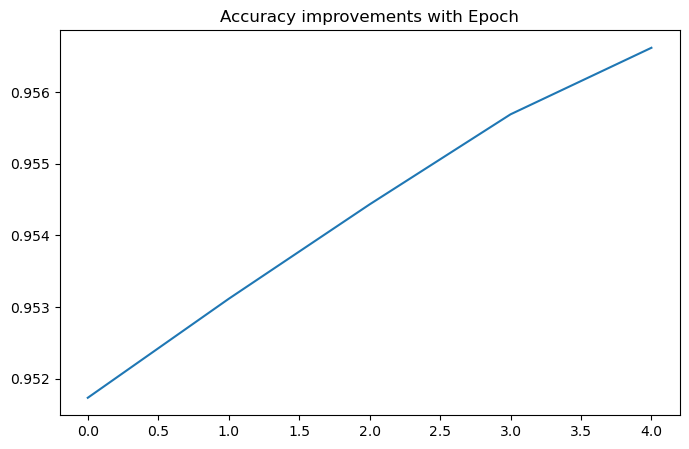


Evaluation against Test Dataset :
------------------------------------
4647/4647 ━━━━━━━━━━━━━━━━━━━━ 2s 376us/step - accuracy: 0.9387 - loss: 0.2330


[0.23296234011650085, 0.9386461973190308]

In [65]:
print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test_vec_trump,y_test)

In [66]:
# Predict for multiple samples using batch processing

# Use the same vectorizer model that was used for training (e.g., vectorizer_trump or vectorizer_clinton)
predict_tfidf = vectorizer_trump.transform(["didnt support dad didnt support voted today and yes will do excellent"]).toarray()

# Print the shape of the resulting TF-IDF array
print(predict_tfidf.shape)

# Predict using the model
prediction = np.argmax(model.predict(predict_tfidf), axis=1)
print("Prediction Output:", prediction)

# Print prediction classes
print("Prediction Classes are ", label_encoder.inverse_transform(prediction))

(1, 5000)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Prediction Output: [2]
Prediction Classes are  ['positive']


In [68]:
score = model.evaluate(X_test_vec_trump, y_test, verbose=1)

4647/4647 ━━━━━━━━━━━━━━━━━━━━ 2s 333us/step - accuracy: 0.9387 - loss: 0.2330


## 4. Error Analysis

### 4.1 Retrieve Misclassified Examples

In [28]:
# Function to retrieve misclassified examples
def get_misclassified_examples(df, X_test, y_test, y_pred):
    # Create a DataFrame for analysis
    misclassified = df.loc[X_test.index].copy()
    misclassified['True Sentiment'] = y_test.values
    misclassified['Predicted Sentiment'] = y_pred
    misclassified = misclassified[misclassified['True Sentiment'] != misclassified['Predicted Sentiment']]
    return misclassified

### 4.2 Error Analysis For Trump and Clinton

In [29]:
# Predict on the test set for Trump
y_pred_trump = model_trump.predict(X_test_vec_trump)
misclassified_trump = get_misclassified_examples(trump_df, X_test_trump, y_test_trump, y_pred_trump)

# Predict on the test set for Clinton
y_pred_Clinton = model_Clinton.predict(X_test_vec_Clinton)
misclassified_Clinton = get_misclassified_examples(clinton_df, X_test_Clinton, y_test_Clinton, y_pred_Clinton)


### 4.3 Analyze Misclassified Examples

In [30]:
# Display and analyze five misclassified examples for Trump
print("Misclassified Examples for Trump:")
misclassified_trump[['NewTweet', 'True Sentiment', 'Predicted Sentiment']].head(5)


Misclassified Examples for Trump:


NewTweet True Sentiment  \
626643  please stop calling automated message whole fa...        neutral   
606210  lunch break expecting calmness pro christian r...       positive   
410895  penny say ca defend make performance ridiculou...        neutral   
235372  man never stopped interrupting must serious me...       positive   
329847                 look dull today seems feeling well        neutral   

       Predicted Sentiment  
626643            positive  
606210             neutral  
410895            negative  
235372            negative  
329847            positive

In [31]:
# Display and analyze five misclassified examples for Clinton
print("\nMisclassified Examples for Clinton:")
misclassified_Clinton[['NewTweet', 'True Sentiment', 'Predicted Sentiment']].head(5)



Misclassified Examples for Clinton:


NewTweet True Sentiment  \
237771  cnnclinton news network nbcnothing msnbcmaking...        neutral   
235956  fave part lime green pantsuit matched cab cham...       positive   
165569                  sound guarantee happen greediness       negative   
234552  protected predatory pervert rather step protec...        neutral   
176378                                yeah mean drop smfh        neutral   

       Predicted Sentiment  
237771            positive  
235956             neutral  
165569            positive  
234552            negative  
176378            positive


#### 4.3.1 Why the Model Failed for Misclassified Cases

1. **Ambiguity and Mixed Sentiment**:
   - Tweets containing both positive and negative sentiments led to confusion, making it hard for the model to classify correctly.

2. **Sarcasm and Irony**:
   - The model could not detect sarcasm or irony as it lacks contextual understanding. This resulted in misclassification for tweets with sarcastic tones.

3. **Informal Language and Slang**:
   - Informal expressions, slang, and abbreviations (e.g., "beat all those fools") were not handled effectively by the model.

4. **Overemphasis on Certain Words**:
   - The model over-relied on specific words (e.g., "smart," "complex") associated with certain sentiments in the training data, leading to incorrect predictions.

5. **Position Bias**:
   - For longer tweets, the model often focused on the beginning and ignored critical context in the latter parts.

### Recommendations for Improvement

1. **Advanced Contextual Models**:
   - Use transformer-based models like BERT or RoBERTa to capture nuanced and sarcastic sentiments.

2. **Balanced Training Data**:
   - Include more examples of sarcasm, mixed sentiment, and informal language to improve training.

3. **Enhanced Preprocessing**:
   - Incorporate sarcasm detection or sentiment-specific feature engineering.

4. **Explore Deep Learning**:
   - Implement RNNs, LSTMs, or Transformers for better understanding of long-term dependencies and subtle language nuances.

This analysis provides insights into the model's limitations and suggests clear paths for improvement.


## 5. Transformers

In [32]:
# Import necessary libraries
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

### 5.1 Loading Pre-trained Roberta Model and Dataset for Sentiment Analysis

This code loads the pre-trained RoBERTa sentiment analysis model (cardiffnlp/twitter-roberta-base-sentiment-latest) along with its tokenizer for analyzing tweets. Additionally, it reads the first 1000 rows from the Trump and Clinton datasets (trump2016_cleaned.csv and clinton2016_cleaned.csv) to prepare the data for sentiment classification.

In [33]:
# Load the pre-trained tokenizer and model
model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Load the dataset (only the first 1000 rows)
trump_file_path = 'trump2016_cleaned.csv'
clinton_file_path = 'clinton2016_cleaned.csv'

trump_df = pd.read_csv(trump_file_path, nrows=1000)  # Load only the first 1000 rows
clinton_df = pd.read_csv(clinton_file_path, nrows=1000)  # Load only the first 1000 rows


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### 5.2 Training and Evaluating Sentiment Analysis Models for Trump and Clinton Tweets Using Pre-trained RoBERTa

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import Dataset
from transformers import Trainer, TrainingArguments
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.metrics import accuracy_score, classification_report

model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Preprocess the dataset
def preprocess_data(df):
    # Remove null or non-string entries
    df = df[df['NewTweet'].apply(lambda x: isinstance(x, str))]
    # Check if 'sentiment' column exists
    if 'sentiment' not in df.columns:
        raise KeyError("The DataFrame does not contain the 'sentiment' column.")
    
    # Map sentiment labels to integers
    label_map = {'negative': 0, 'neutral': 1, 'positive': 2}
    df['label'] = df['sentiment'].map(label_map)
    
    # Sample 1000 rows from the dataset if available
    if len(df) > 1000:
        df = df.sample(n=1000, random_state=42)
    return df[['NewTweet', 'label']].reset_index(drop=True)

# Load the datasets
trump_file_path = 'trump2016_cleaned.csv'
clinton_file_path = 'clinton2016_cleaned.csv'

trump_df = pd.read_csv(trump_file_path, lineterminator='\n')
clinton_df = pd.read_csv(clinton_file_path, lineterminator='\n')

# Preprocess the datasets
trump_df = preprocess_data(trump_df)
clinton_df = preprocess_data(clinton_df)

# Tokenize the dataset
def tokenize_data(examples):
    return tokenizer(
        examples["NewTweet"],
        padding="max_length",
        truncation=True,
        max_length=128
    )

# Split data into training and testing sets
def split_and_prepare_data(df):
    train_texts, test_texts, train_labels, test_labels = train_test_split(
        df["NewTweet"], df["label"], test_size=0.2, random_state=42, stratify=df["label"]
    )
    train_df = pd.DataFrame({'NewTweet': train_texts, 'label': train_labels})
    test_df = pd.DataFrame({'NewTweet': test_texts, 'label': test_labels})
    return (
        Dataset.from_pandas(train_df).map(tokenize_data, batched=True),
        Dataset.from_pandas(test_df).map(tokenize_data, batched=True)
    )

train_dataset_trump, test_dataset_trump = split_and_prepare_data(trump_df)
train_dataset_clinton, test_dataset_clinton = split_and_prepare_data(clinton_df)

# Remove unnecessary columns
train_dataset_trump = train_dataset_trump.remove_columns(["NewTweet"])
test_dataset_trump = test_dataset_trump.remove_columns(["NewTweet"])
train_dataset_clinton = train_dataset_clinton.remove_columns(["NewTweet"])
test_dataset_clinton = test_dataset_clinton.remove_columns(["NewTweet"])

# Define compute metrics function
def compute_metrics(pred):
    predictions = pred.predictions.argmax(axis=1)
    labels = pred.label_ids
    return {
        "accuracy": accuracy_score(labels, predictions),
        "classification_report": classification_report(labels, predictions, digits=4)
    }

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    learning_rate=2e-5,
    logging_dir="./logs",
    load_best_model_at_end=True,
    save_total_limit=2,
    logging_steps=50,
    report_to="none"
)

# Create Trainer for Trump dataset
trainer_trump = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset_trump,
    eval_dataset=test_dataset_trump,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Create Trainer for Clinton dataset
trainer_clinton = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset_clinton,
    eval_dataset=test_dataset_clinton,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Train and evaluate models
print("Training model for Trump tweets...")
trainer_trump.train()
print("\nEvaluating model for Trump tweets...")
trump_eval_results = trainer_trump.evaluate()
print("Evaluation Results for Trump Dataset:")
print(trump_eval_results)

print("\nTraining model for Clinton tweets...")
trainer_clinton.train()
print("\nEvaluating model for Clinton tweets...")
clinton_eval_results = trainer_clinton.evaluate()
print("Evaluation Results for Clinton Dataset:")
print(clinton_eval_results)

# Save the trained models
trainer_trump.save_model("./trump_sentiment_model")
trainer_clinton.save_model("./clinton_sentiment_model")

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/var/folders/pk/gfqpq8215cx4_4s68tj0c7w40000gn/T/ipykernel_13366/3131917573.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

/Users/mohanad/anaconda3/lib/python3.11/site-packages/transformers/training_args.py:1525: FutureWarning:

`evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead



Training model for Trump tweets...


  0%|          | 0/150 [00:00<?, ?it/s]

{'loss': 0.772, 'grad_norm': 21.966821670532227, 'learning_rate': 1.3333333333333333e-05, 'epoch': 1.0}


  0%|          | 0/13 [00:00<?, ?it/s]

{'eval_loss': 0.6610742211341858, 'eval_accuracy': 0.745, 'eval_classification_report': '              precision    recall  f1-score   support\n\n           0     0.7794    0.7571    0.7681        70\n           1     0.6418    0.7818    0.7049        55\n           2     0.8154    0.7067    0.7571        75\n\n    accuracy                         0.7450       200\n   macro avg     0.7455    0.7485    0.7434       200\nweighted avg     0.7551    0.7450    0.7466       200\n', 'eval_runtime': 6.3821, 'eval_samples_per_second': 31.338, 'eval_steps_per_second': 2.037, 'epoch': 1.0}
{'loss': 0.4872, 'grad_norm': 16.148162841796875, 'learning_rate': 6.666666666666667e-06, 'epoch': 2.0}


  0%|          | 0/13 [00:00<?, ?it/s]

{'eval_loss': 0.6683772206306458, 'eval_accuracy': 0.76, 'eval_classification_report': '              precision    recall  f1-score   support\n\n           0     0.7250    0.8286    0.7733        70\n           1     0.7018    0.7273    0.7143        55\n           2     0.8571    0.7200    0.7826        75\n\n    accuracy                         0.7600       200\n   macro avg     0.7613    0.7586    0.7567       200\nweighted avg     0.7682    0.7600    0.7606       200\n', 'eval_runtime': 4.1633, 'eval_samples_per_second': 48.039, 'eval_steps_per_second': 3.123, 'epoch': 2.0}
{'loss': 0.3424, 'grad_norm': 24.42597770690918, 'learning_rate': 0.0, 'epoch': 3.0}


  0%|          | 0/13 [00:00<?, ?it/s]

{'eval_loss': 0.7505418658256531, 'eval_accuracy': 0.77, 'eval_classification_report': '              precision    recall  f1-score   support\n\n           0     0.7532    0.8286    0.7891        70\n           1     0.7222    0.7091    0.7156        55\n           2     0.8261    0.7600    0.7917        75\n\n    accuracy                         0.7700       200\n   macro avg     0.7672    0.7659    0.7655       200\nweighted avg     0.7720    0.7700    0.7699       200\n', 'eval_runtime': 3.4075, 'eval_samples_per_second': 58.694, 'eval_steps_per_second': 3.815, 'epoch': 3.0}
{'train_runtime': 209.6761, 'train_samples_per_second': 11.446, 'train_steps_per_second': 0.715, 'train_loss': 0.533867441813151, 'epoch': 3.0}

Evaluating model for Trump tweets...


  0%|          | 0/13 [00:00<?, ?it/s]

Evaluation Results for Trump Dataset:
{'eval_loss': 0.6610742211341858, 'eval_accuracy': 0.745, 'eval_classification_report': '              precision    recall  f1-score   support\n\n           0     0.7794    0.7571    0.7681        70\n           1     0.6418    0.7818    0.7049        55\n           2     0.8154    0.7067    0.7571        75\n\n    accuracy                         0.7450       200\n   macro avg     0.7455    0.7485    0.7434       200\nweighted avg     0.7551    0.7450    0.7466       200\n', 'eval_runtime': 3.4398, 'eval_samples_per_second': 58.144, 'eval_steps_per_second': 3.779, 'epoch': 3.0}

Training model for Clinton tweets...


  0%|          | 0/150 [00:00<?, ?it/s]

{'loss': 0.7441, 'grad_norm': 18.37104606628418, 'learning_rate': 1.3333333333333333e-05, 'epoch': 1.0}


  0%|          | 0/13 [00:00<?, ?it/s]

{'eval_loss': 0.6358476877212524, 'eval_accuracy': 0.735, 'eval_classification_report': '              precision    recall  f1-score   support\n\n           0     0.7500    0.8750    0.8077        72\n           1     0.7302    0.6765    0.7023        68\n           2     0.7170    0.6333    0.6726        60\n\n    accuracy                         0.7350       200\n   macro avg     0.7324    0.7283    0.7275       200\nweighted avg     0.7333    0.7350    0.7313       200\n', 'eval_runtime': 4.6907, 'eval_samples_per_second': 42.638, 'eval_steps_per_second': 2.771, 'epoch': 1.0}
{'loss': 0.4961, 'grad_norm': 23.06912612915039, 'learning_rate': 6.666666666666667e-06, 'epoch': 2.0}


  0%|          | 0/13 [00:00<?, ?it/s]

{'eval_loss': 0.6512077450752258, 'eval_accuracy': 0.755, 'eval_classification_report': '              precision    recall  f1-score   support\n\n           0     0.7386    0.9028    0.8125        72\n           1     0.8333    0.6618    0.7377        68\n           2     0.7069    0.6833    0.6949        60\n\n    accuracy                         0.7550       200\n   macro avg     0.7596    0.7493    0.7484       200\nweighted avg     0.7613    0.7550    0.7518       200\n', 'eval_runtime': 6.9041, 'eval_samples_per_second': 28.968, 'eval_steps_per_second': 1.883, 'epoch': 2.0}
{'loss': 0.3576, 'grad_norm': 4.6161322593688965, 'learning_rate': 0.0, 'epoch': 3.0}


  0%|          | 0/13 [00:00<?, ?it/s]

{'eval_loss': 0.6694620251655579, 'eval_accuracy': 0.75, 'eval_classification_report': '              precision    recall  f1-score   support\n\n           0     0.7222    0.9028    0.8025        72\n           1     0.8103    0.6912    0.7460        68\n           2     0.7308    0.6333    0.6786        60\n\n    accuracy                         0.7500       200\n   macro avg     0.7544    0.7424    0.7424       200\nweighted avg     0.7547    0.7500    0.7461       200\n', 'eval_runtime': 4.699, 'eval_samples_per_second': 42.562, 'eval_steps_per_second': 2.767, 'epoch': 3.0}
{'train_runtime': 262.5187, 'train_samples_per_second': 9.142, 'train_steps_per_second': 0.571, 'train_loss': 0.5326004409790039, 'epoch': 3.0}

Evaluating model for Clinton tweets...


  0%|          | 0/13 [00:00<?, ?it/s]

Evaluation Results for Clinton Dataset:
{'eval_loss': 0.6358476877212524, 'eval_accuracy': 0.735, 'eval_classification_report': '              precision    recall  f1-score   support\n\n           0     0.7500    0.8750    0.8077        72\n           1     0.7302    0.6765    0.7023        68\n           2     0.7170    0.6333    0.6726        60\n\n    accuracy                         0.7350       200\n   macro avg     0.7324    0.7283    0.7275       200\nweighted avg     0.7333    0.7350    0.7313       200\n', 'eval_runtime': 3.7015, 'eval_samples_per_second': 54.033, 'eval_steps_per_second': 3.512, 'epoch': 3.0}


### 5.3 Evaluating Sentiment Classification Models and Analyzing Misclassified Examples

Evaluating Trump model...


  0%|          | 0/13 [00:00<?, ?it/s]

Confusion Matrix for Trump Model:

Classification Report for Trump Model:
              precision    recall  f1-score   support

    Negative       0.75      0.83      0.79        70
     Neutral       0.67      0.80      0.73        55
    Positive       0.89      0.68      0.77        75

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.76       200
weighted avg       0.78      0.77      0.77       200


Misclassified Examples for Trump:
                                              NewTweet  True Sentiment  \
968  exclusive plan frame leaked infowarscomexclusi...               0   
939  reporter stunned learn fan lining hour rally s...               2   
859                             none blind choose wake               2   
226                boy really must wanted prez subject               1   
429  anything bc democracy person anything sit clas...               1   
214  storm scariest order military check bals airst...            

  0%|          | 0/13 [00:00<?, ?it/s]

Confusion Matrix for Clinton Model:

Classification Report for Clinton Model:
              precision    recall  f1-score   support

    Negative       0.75      0.88      0.81        72
     Neutral       0.73      0.68      0.70        68
    Positive       0.72      0.63      0.67        60

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200


Misclassified Examples for Clinton:
                                              NewTweet  True Sentiment  \
513        sounding human leveraging travel experience               1   
947                                        burn server               1   
172                                             polite               1   
833                          several thing amen sister               1   
110        lol something else twittercomstreamlasvegas               2   
745                    mic work mic work fine drop mic      

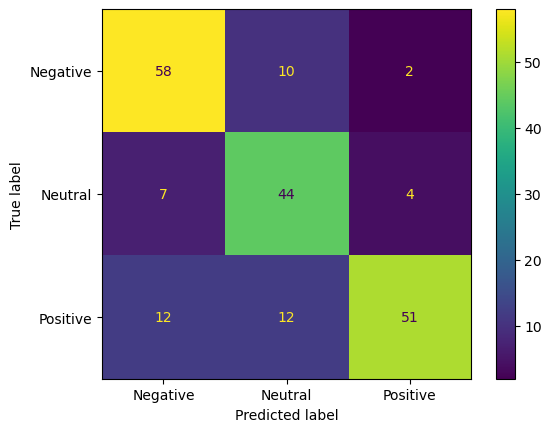

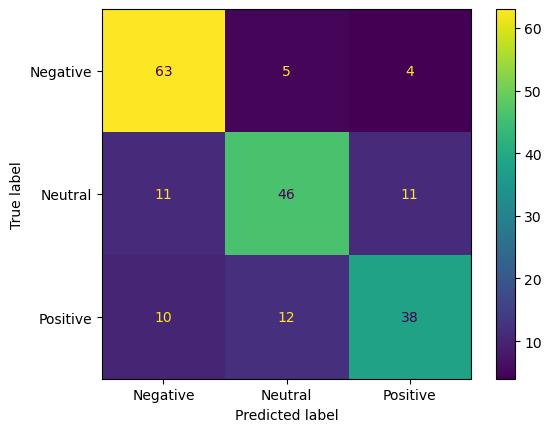

In [37]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Evaluate and process misclassified examples for a given model and dataset
def evaluate_model(trainer, test_dataset, original_df, model_name):
    # Get predictions and ground truths
    y_pred = trainer.predict(test_dataset).predictions.argmax(axis=1)
    y_true = test_dataset["label"]

    # Map predictions back to original DataFrame
    test_indices = test_dataset["__index_level_0__"]
    misclassified = original_df.iloc[test_indices].copy()
    misclassified["True Sentiment"] = y_true
    misclassified["Predicted Sentiment"] = y_pred

    # Filter for misclassified examples
    misclassified = misclassified[misclassified["True Sentiment"] != misclassified["Predicted Sentiment"]]

    # Print confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])
    print(f"Confusion Matrix for {model_name} Model:")
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Neutral", "Positive"]).plot()

    # Print classification report
    print(f"\nClassification Report for {model_name} Model:")
    print(classification_report(y_true, y_pred, target_names=["Negative", "Neutral", "Positive"]))

    # Show misclassified examples
    print(f"\nMisclassified Examples for {model_name}:")
    print(misclassified[["NewTweet", "True Sentiment", "Predicted Sentiment"]].head(10))
    return misclassified

# Evaluate Trump model
print("Evaluating Trump model...")
misclassified_trump = evaluate_model(trainer_trump, test_dataset_trump, trump_df, "Trump")

# Evaluate Clinton model
print("\nEvaluating Clinton model...")
misclassified_clinton = evaluate_model(trainer_clinton, test_dataset_clinton, clinton_df, "Clinton")


In [71]:
!jupyter nbconvert --to html "notebook.ipynb"


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[NbConvertApp] Converting notebook notebook.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 17 image(s).
[NbConvertApp] Writing 6866844 bytes to notebook.html
